In [4]:
import ipywidgets as widgets
from IPython import display as display
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def create_button():
  button = widgets.Button(
    description='Siguente Iteracion',
    disabled=False,
    button_style='info',
    tooltip='Siguiente iteracion',
    icon='check'
  )
  return button

def graficar_aptitudes(aptitudes, global_mejor):
  paletaColores = np.array(['#f2190e','#f68a04','#ffde00','#ff00d6','#cb00ff','#a7ff00','#5600ff','#00ff68','#00c0ff','#00ffc9'])
  for i in range(0, len(aptitudes)):
    if rosenbrock(global_mejor) == aptitudes[i]:
      plt.plot(i+1,aptitudes[i],'r*',markersize=15)
    else: 
      plt.scatter(i+1, aptitudes[i], c= paletaColores[i])
  plt.xlabel('N* Particula')
  plt.xlabel('Aptitud')
  plt.ylim(min(aptitudes), max(aptitudes))  

# ***Function Rosenbrock ***

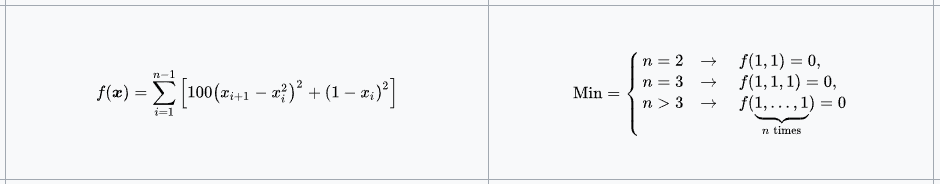

In [5]:
# Definiendo las funciones.
# Rosenbrock en 3 dimensiones

def rosenbrock(x:list):
  y = 0
  for i in range(0,len(x)-1):
    y += (100*((x[i+1]-(x[i]**2))**2)) + ((1-x[i])**2)
  return y

# Funcion para encontrar el número mas cercano a 1
# Recibe una lista y devuelve el numero mas cercano a 0



Iteracion-> 14 
Mejor Particula en posicion ->  [ 0.41487412  0.18618232 -0.02989075] 
Valor de aptitud ->  1.4411746547756406
         D1        D2        D3    Aptitud
0  0.810798  0.537767  0.212508   2.268551
1  0.414874  0.186182 -0.029891   1.441175
2  0.419693  0.094065  0.274551   8.890948
3  0.977682  0.630205 -0.068652  32.440325
4  0.469355  0.081567 -0.083903   3.869671
5 -0.041186 -0.017889  0.138190   4.059326
6  0.822359  0.455444  0.287502   5.845842
7  0.510375  0.032219 -0.007278   6.393689
8  0.730419  0.468346  0.005305   5.361449
9  0.080362 -0.038702  0.181424   5.365915


Button(button_style='info', description='Siguente Iteracion', icon='check', style=ButtonStyle(), tooltip='Sigu…

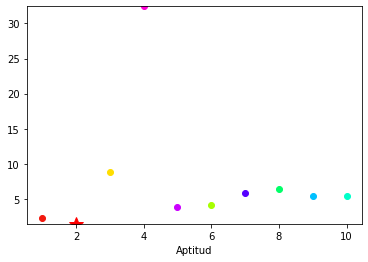

In [6]:
9# Se define el espacio de busqueda
limiteInferior = -2
limiteSuperior = 2

# Se declara el numero de particulas y sus dimensiones. 
particulas = 10
dimensiones = 3

# Se genera el enjambre y sus velocidades de forma aleatoria.
enjambre = limiteInferior + (limiteSuperior - limiteInferior) * np.random.rand(particulas, dimensiones) 
velocidades = -(limiteSuperior - limiteInferior)/2+(limiteSuperior - limiteInferior)*np.random.rand(particulas, dimensiones)

# Inicializamos los valores de nuestra funcion objetivo, comenzando desde el peor de los casos. 
# Debido a que estamos solucionando un problema de minimizacion el peor caso en el +infinito. :O
aptitud_global = np.inf
aptitud_local = np.inf * np.ones(particulas)


individuo_global = 1*enjambre[0]
enjambre_local =1*enjambre

# Se busca el individuo con la mejor aptitud antes de la primera iteracion
# Se calcula el valor de las aptitudes de cada particula
for i in range(0,particulas):
  aptitud_local[i] = rosenbrock(enjambre_local[i])
  if rosenbrock(enjambre_local[i]) < rosenbrock(individuo_global):
    individuo_global = enjambre_local[i]

print('=====ESTADO DE INICIALIZACION=====')
df = pd.DataFrame(enjambre_local, columns=['D1', 'D2', 'D3'])
df['Aptitud'] = aptitud_local
print(df)
iteracion = 0

print('\nIteracion->',str(iteracion), '\nMejor Particula en posicion -> ',str(individuo_global), '\nValor de aptitud -> ',str(rosenbrock(individuo_global)))

peso = 0.8

coef_individual = 0.3
coef_lider = 0.7

def iterar(a):
  global iteracion
  global peso, coef_individual, coef_lider
  global enjambre, velocidades, individuo_global, enjambre_local
  global aptitud_local

  display.clear_output(wait=True)
  
  iteracion += 1
  # Mover la particula. 
  for  i in range(0,particulas):
    for j in range(0,dimensiones):
      R1 = np.random.rand()
      R2 = np.random.rand()
      velocidades[i][j] = (peso*velocidades[i][j] 
                           + coef_individual*R1*(enjambre_local[i][j] - enjambre[i][j]) 
                           + coef_lider*R2*(individuo_global[j] - enjambre[i][j]))
      enjambre[i][j] = enjambre[i][j] + velocidades[i][j]
    if rosenbrock(enjambre[i]) < rosenbrock(enjambre_local[i]):
      enjambre_local[i] = enjambre[i]
      if rosenbrock(enjambre_local[i]) < rosenbrock(individuo_global):
        individuo_global = enjambre_local[i]
  
  #Se actualiza el valor de la lista de aptitudes de cada particula
  for i in range(0,particulas):
    aptitud_local[i] = rosenbrock(enjambre_local[i])
  print('\nIteracion->',str(iteracion), '\nMejor Particula en posicion -> ',str(individuo_global), '\nValor de aptitud -> ',str(rosenbrock(individuo_global)))
  df = pd.DataFrame(enjambre_local, columns=['D1', 'D2', 'D3'])
  df['Aptitud'] = aptitud_local
  print(df)
  display.display(button)
  graficar_aptitudes(aptitud_local, individuo_global) 

  
global_fig = plt.figure()
ax = plt.axes()

button=create_button()
button.on_click(iterar)
display.display(button)

graficar_aptitudes(aptitud_local, individuo_global)